### Dimensionality Reduction & Representation Learning 

In [233]:
### Import Pytorch and other relevant packages
import torch
import torch.nn as nn
### Import MNIST dataset 
from torchvision.datasets import MNIST
### Load Numpy and Matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [234]:
### Download MNIST data 
train_set = MNIST('.',download=True)
test_set = MNIST('.',train=False)

In [235]:
### Load the training and test data [x], along with labels [y]
xTrain, yTrain = torch.load('MNIST/processed/training.pt')
xTest, yTest = torch.load('MNIST/processed/test.pt')

In [236]:
### Get to know your data
print(train_set)
print(test_set)
print("X_train: " + str(xTrain.shape))
print("Y_train: " + str(yTrain.shape))
print("X_test:  "  + str(xTest.shape))
print("Y_test:  "  + str(yTest.shape))

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
X_train: torch.Size([60000, 28, 28])
Y_train: torch.Size([60000])
X_test:  torch.Size([10000, 28, 28])
Y_test:  torch.Size([10000])


tensor([5, 0, 4,  ..., 5, 6, 8])
0:5923
1:6742
2:5958
3:6131
4:5842
5:5421
6:5918
7:6265
8:5851
9:5949


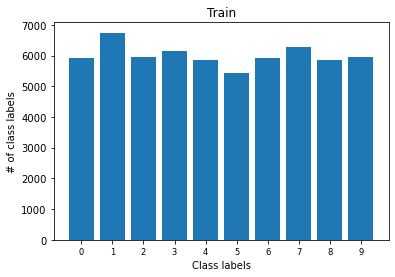

tensor([7, 2, 1,  ..., 4, 5, 6])
0:980
1:1135
2:1032
3:1010
4:982
5:892
6:958
7:1028
8:974
9:1009


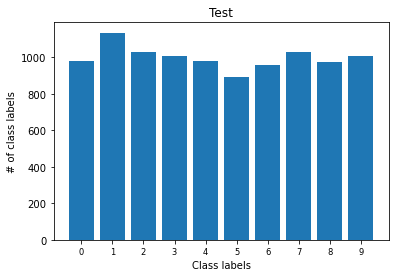

In [237]:
### Subset of data with [0,1,2,3,4,5] classes only
count0, count1, count2, count3, count4, count5, count6, count7, count8, count9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range(60000):
    if yTrain[i] == 0:
        count0 += 1
    elif yTrain[i] == 1:
        count1 += 1
    elif yTrain[i] == 2:
        count2 += 1
    elif yTrain[i] == 3:
        count3 += 1
    elif yTrain[i] == 4:
        count4 += 1
    elif yTrain[i] == 5:
        count5 += 1
    elif yTrain[i] == 6:
        count6 += 1
    elif yTrain[i] == 7:
        count7 += 1
    elif yTrain[i] == 8:
        count8 += 1
    elif yTrain[i] == 9:
        count9 += 1
print(yTrain)
print("0:" + str(count0))
print("1:" + str(count1))
print("2:" + str(count2))
print("3:" + str(count3))
print("4:" + str(count4))
print("5:" + str(count5))
print("6:" + str(count6))
print("7:" + str(count7))
print("8:" + str(count8))
print("9:" + str(count9))
hist1 = {"0":count0, "1":count1, "2":count2, "3":count3, "4":count4, "5":count5 ,"6":count6, "7":count7, "8":count8, "9":count9}
df = pd.Series(hist1)
plt.bar(range(len(df)), df.values, align='center')
plt.xticks(range(len(df)), df.index.values, size='small')
plt.xlabel("Class labels")
plt.ylabel('# of class labels')
plt.title("Train")
plt.savefig("yTrain")
plt.show()

count0, count1, count2, count3, count4, count5, count6, count7, count8, count9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range(10000):
    if yTest[i] == 0:
        count0 += 1
    elif yTest[i] == 1:
        count1 += 1
    elif yTest[i] == 2:
        count2 += 1
    elif yTest[i] == 3:
        count3 += 1
    elif yTest[i] == 4:
        count4 += 1
    elif yTest[i] == 5:
        count5 += 1
    elif yTest[i] == 6:
        count6 += 1
    elif yTest[i] == 7:
        count7 += 1
    elif yTest[i] == 8:
        count8 += 1
    elif yTest[i] == 9:
        count9 += 1
print(yTest)
print("0:" + str(count0))
print("1:" + str(count1))
print("2:" + str(count2))
print("3:" + str(count3))
print("4:" + str(count4))
print("5:" + str(count5))
print("6:" + str(count6))
print("7:" + str(count7))
print("8:" + str(count8))
print("9:" + str(count9))
hist1 = {"0":count0, "1":count1, "2":count2, "3":count3, "4":count4, "5":count5 ,"6":count6, "7":count7, "8":count8, "9":count9}
df = pd.Series(hist1)
plt.bar(range(len(df)), df.values, align='center')
plt.xticks(range(len(df)), df.index.values, size='small')
plt.xlabel("Class labels")
plt.ylabel('# of class labels')
plt.title("Test")
plt.savefig("yTest")
plt.show()

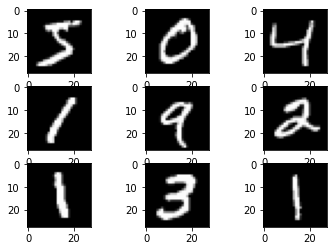

In [238]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(xTrain[i], cmap=plt.get_cmap('gray'))
plt.savefig("sample1")
plt.show()

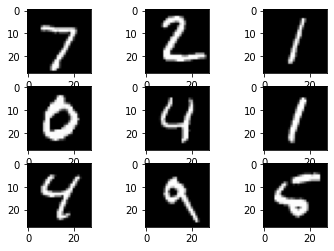

In [239]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(xTest[i], cmap=plt.get_cmap('gray'))
plt.savefig("sample2")
plt.show()

In [240]:
### Reshape the images from Nx28x28 to Nx784
xTrain = xTrain.reshape(xTrain.shape[0], 784)
print(xTrain.shape)
xTest = xTest.reshape(xTest.shape[0], 784)
print(xTest.shape)

torch.Size([60000, 784])
torch.Size([10000, 784])


In [241]:
### Save copies of torch data in numpy as sklearn uses numpy arrays
xTrainNp, yTrainNp = xTrain.numpy(), yTrain.numpy()
xTestNp, yTestNp = xTest.numpy(), yTest.numpy()

### Principal Component Analysis
Use the sklearn package to perform the PCA tasks. 

30596
(30596, 784)
(30596, 1)


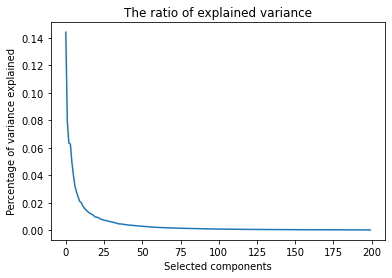

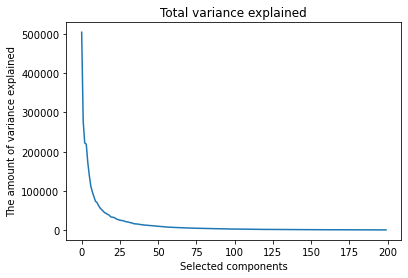

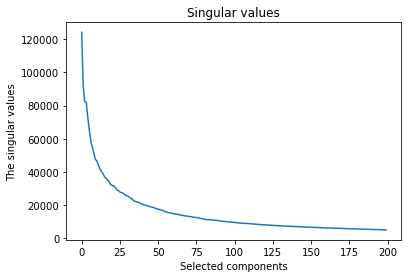

In [273]:
count = 0
xDataset = np.zeros(shape=(60000,784))
yDataset = []
for i in range(60000):
    if yTrainNp[i] == 0 or yTrainNp[i] == 1 or yTrainNp[i] == 2 or yTrainNp[i] == 3 or yTrainNp[i] == 4:
        count+=1
        xDataset[i] = xTrainNp[i]
        yDataset.append([yTrainNp[i]])
print(count)
m, n = xDataset.shape
rows = [row for row in range(m) if not all(xDataset[row] == 0)]
xDataset = xDataset[rows]
print(xDataset.shape)
yDataset = np.array(yDataset)
print(yDataset.shape)

from sklearn.decomposition import PCA
X = xDataset
pca = PCA(n_components=200)
pca.fit(X)
eigen_spectrum = pca.explained_variance_ratio_
plt.plot(eigen_spectrum)
plt.xlabel("Selected components")
plt.ylabel("Percentage of variance explained")
plt.title("The ratio of explained variance")
plt.savefig("The ratio of explained variance")
plt.show()

explained_variance = pca.explained_variance_
plt.plot(explained_variance)
plt.xlabel("Selected components")
plt.ylabel("The amount of variance explained")
plt.title("Total variance explained")
plt.savefig("Total variance explained")
plt.show()

singular_values = pca.singular_values_
plt.plot(singular_values)
plt.xlabel("Selected components")
plt.ylabel("The singular values")
plt.title("Singular values")
plt.savefig("Singular values")
plt.show()

(30596, 784)


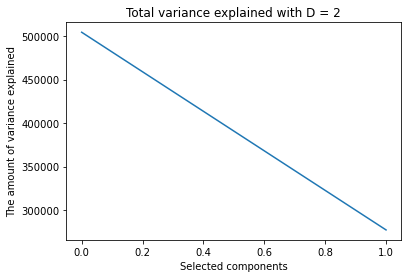

In [286]:
X = xDataset
pca2 = PCA(n_components=2)
pca2.fit(X)
print(X.shape)
explained_variance2 = pca2.explained_variance_
plt.plot(explained_variance2)
plt.xlabel("Selected components")
plt.ylabel("The amount of variance explained")
plt.title("Total variance explained with D = 2")
plt.savefig("Total variance explained with D = 2")
plt.show()

In [290]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(xDataset)
# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(xDataset)
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_train_pca)
print(principalComponents.shape)
x1 = principalComponents[:,0]
x2 = principalComponents[:,1]
y = yDataset

(30596, 2)


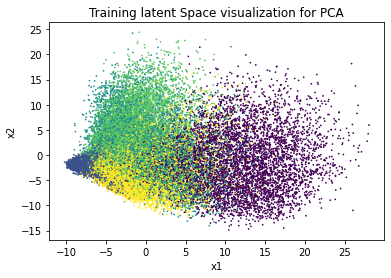

In [291]:
### Sample plot to visualize the latent space
### If x1, x2 are the 1st and 2nd dimensions of 
### dimensionality reduced data, with labels y.
plt.title("Training latent Space visualization for PCA")
plt.scatter(x1,x2,c=y,s=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.savefig("Training latent Space visualization for PCA")

(10000, 2)


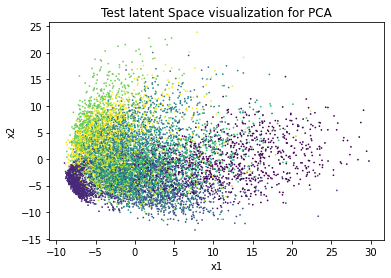

In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(xTestNp)
# Apply transform to both the training set and the test set.
X_test_pca = scaler.transform(xTestNp)
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_test_pca)
print(principalComponents.shape)
x1 = principalComponents[:,0]
x2 = principalComponents[:,1]
y = yTestNp

plt.title("Test latent Space visualization for PCA")
plt.scatter(x1,x2,c=y,s=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.savefig("Test latent Space visualization for PCA")

### Autoencoders
Below the Pytorch classes for an autoencoder and variational autoencoder, along with a training script 
are provided with some key components to be filled in by you. 

In [293]:
### Import additional torch modules
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [294]:
### Set parameters for the model
torch.manual_seed(42) # set fixed random seed for reproducibility

batch_size = 128
epochs = 10
latent_dim = 2
lr = 1e-4

cuda = True # Set this if training on GPU
cuda = cuda and torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("Using "+repr(device))

Using device(type='cuda')


In [295]:
### Torch uses a specialised dataloader for faster access
### It also has some nice properties to do efficient prefetching,
### batching and data augmentation
N = len(train_set)
nTrain = int(0.8*N)
nValid = N-nTrain

valid_set, train_set = random_split(train_set,(nValid,nTrain))
print("Using nTrain: %d, nValid: %d "%(nTrain, nValid))

train_loader = torch.utils.data.DataLoader(train_set,
    batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set,
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,
    batch_size=batch_size, shuffle=True)


Using nTrain: 48000, nValid: 12000 


In [296]:
### Autoencoder class
class AE(nn.Module):
    def __init__(self,latent_dim):
        super(AE, self).__init__()
        ### Encoder layers
        self.fc_enc1 = nn.Linear(784, 32)
        self.fc_enc2 = nn.Linear(32, 16)
        self.fc_enc3 = nn.Linear(16, latent_dim)
        
        ### Decoder layers
        self.fc_dec1 = nn.Linear(latent_dim, 16)
        self.fc_dec2 = nn.Linear(16,32)
        self.fc_dec3 = nn.Linear(32,784)

    def encode(self, x):
        
        ### Fill in the encoder
        ### by calling the corresponding layers
        ### initialized above. 
        ### You can use F.relu() to call the
        ### rectified linear unit activation function.
        
        return z
    
    def decode(self, z):
        
        ### Fill in the decoder
        ### by calling the corresponding layers
        ### initialized above. 
        ### You can use torch.sigmoid() to call the
        ### sigmoid activation function
        
        return xHat

    def forward(self, x):
        ### Autoencoder returns the reconstruction 
        ### and latent representation
        z = self.encode(x)
        # decode z
        xHat = self.decode(z)
        return xHat,z 

In [ ]:
# Reconstruction + KL divergence losses summed over all elements and batch
def elbo_loss(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)

    return BCE + KLD


class VAE(nn.Module):
    def __init__(self,latent_dim):
        super(VAE, self).__init__()
        
        
        ### Encoder layers
        self.fc_enc1 = nn.Linear(784, 32)
        self.fc_enc2 = nn.Linear(32, 16)
        self.fc_enc3 = nn.Linear(16, 2*latent_dim) # Note we return 2*latent_dim
        
        ### Decoder layers
        self.fc_dec1 = nn.Linear(latent_dim, 16)
        self.fc_dec2 = nn.Linear(16,32)
        self.fc_dec3 = nn.Linear(32,784)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        z = ####### Complete the reparameterisation step here
        return z

    def encode(self, x):
        ### Fill in the encoder
        ### by calling the corresponding layers
        ### initialized above.
        ### Think about the use of non-linear
        
        
        mu, logvar = torch.chunk(x,2)
        return mu, logvar

    
    def decode(self, z):
        
        ### Fill in the decoder
        ### by calling the corresponding layers
        ### initialized above. 
        ### You can use torch.sigmoid() to call the
        ### sigmoid activation function
        
        return xHat
    
    def forward(self, x):
        
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        xHat = self.decode(z)
        
        return xHat, mu, logvar

In [ ]:
#### Sample training script for autoencoder
### This has to be modified slightly to work with VAEs!!!

model = AE().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.BCELoss()

for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        xHat, z = model(data)
        loss = loss_function(xHat, data)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(valid_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            valid_loss += loss_function(xHat, data).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    valid_loss /= len(valid_loader.dataset)
    print('====> Validation set loss: {:.4f}'.format(valid_loss))

    
### Use converged model to evaluate on test set.
#
#
test_loss /= len(test_loader.dataset)
print('====> Test set loss: {:.4f}'.format(test_loss))


### Sample from latent space and visualize 
### some examples



In [ ]:
#